# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

In [10]:
!pip install graphviz

In [1]:
# 함수 익히기
from sklearn import tree

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [3]:
clf.predict([[1, 1]])

array([1])

In [1]:
# 모듈 불러오기
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [4]:
import graphviz

In [2]:
import os

In [3]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38'

In [5]:
# 데이터 로드
iris = load_iris()

In [6]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


# 2. 의사결정나무 구축 및 시각화

In [7]:
# 트리 구축
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [8]:
# 트리의 시각화
dot_data = tree.export_graphviz(clf, out_file = None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)

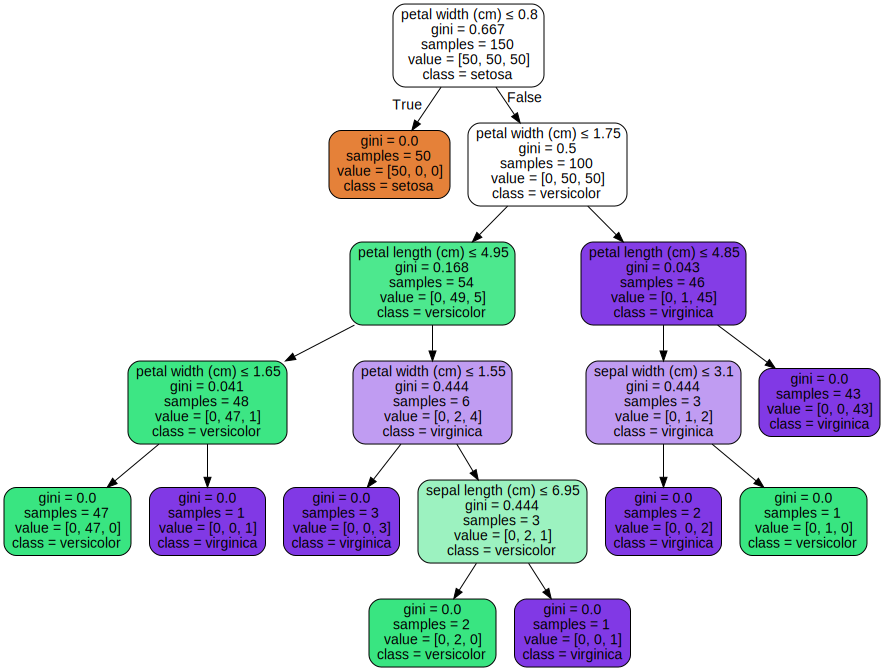

In [10]:
graph

In [11]:
# 엔트로피를 활용한 트리 구축
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(iris.data, iris.target)

In [12]:
dot_data2 = tree.export_graphviz(clf2, out_file = None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True)
graph2 = graphviz.Source(dot_data2)

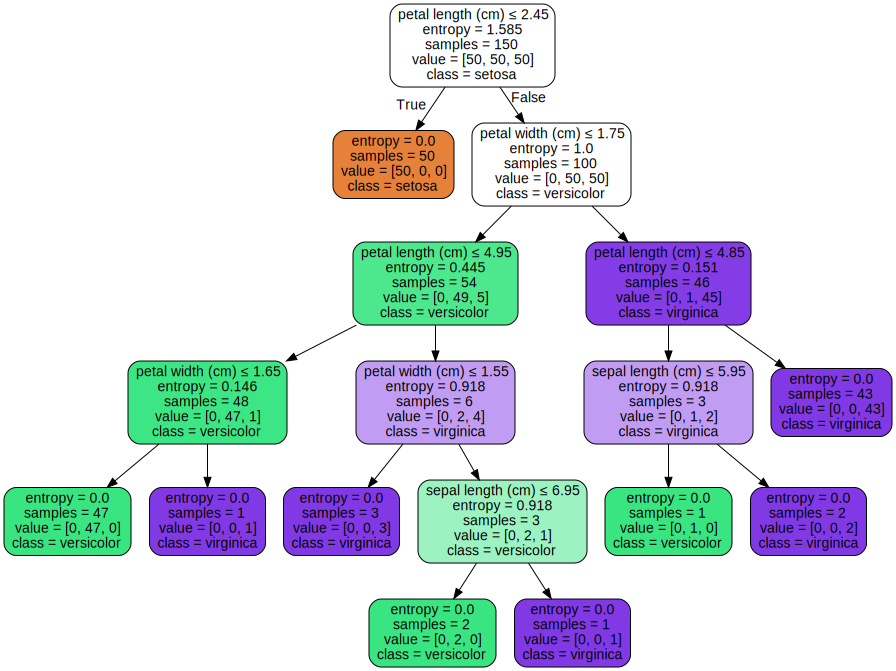

In [13]:
graph2

In [13]:
# 모든 노드에 대하여, entropy가 0이 된다면, 이는 너무 복잡한 트리 구조를 가지게 된다.
# 또한, 오버피팅의 가능성이 매우 높아지게 된다. 따라서, 적당한 수준에서 노드를 끊어주는 역할이 필요하다.

In [14]:
# 프루닝(적절한 depth는, cross validation 방법을 통해서 확인할 수 있다.)
clf3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf3 = clf3.fit(iris.data, iris.target)

dot_data3 = tree.export_graphviz(clf3, out_file = None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True)
graph3 = graphviz.Source(dot_data3)

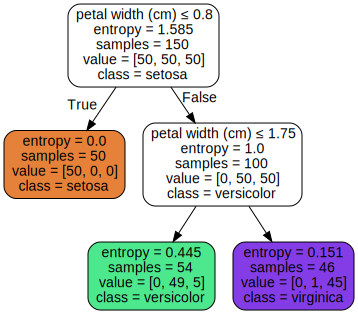

In [15]:
graph3

In [18]:
# confusion matrix 구하기
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [18]:
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [19]:
confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [16]:
# K-Fold Cross Validation 기법을 통합 프루닝
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
k_range = range(1, 10 + 1)
k_scores = list()

for k in k_range:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=k)
    scores = cross_val_score(clf, iris.data, iris.target, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

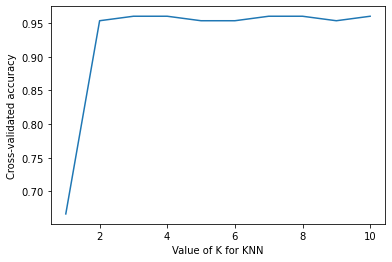

In [17]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [19]:
new_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
new_clf = new_clf.fit(iris.data, iris.target)

confusion_matrix(iris.target, new_clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  1, 49]], dtype=int64)

# 3. Training - Test 구분 및 Confusion matrix 계산

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state = 1)

In [22]:
clf4 = tree.DecisionTreeClassifier(criterion='entropy')
clf4 = clf4.fit(X_train, y_train)

In [23]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

# 4. Decision Regression Tree

In [24]:
# 모듈 불러오기 및 데이터 생성
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis = 0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [25]:
# regression tree 구축
regr1 = tree.DecisionTreeRegressor(max_depth=2)
regr2 = tree.DecisionTreeRegressor(max_depth=5)

In [26]:
regr1 = regr1.fit(X, y)
regr2 = regr2.fit(X, y)

In [27]:
X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [28]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [29]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

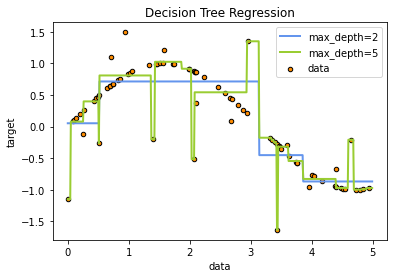

In [30]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [31]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

In [32]:
graph4 = graphviz.Source(dot_data4) 

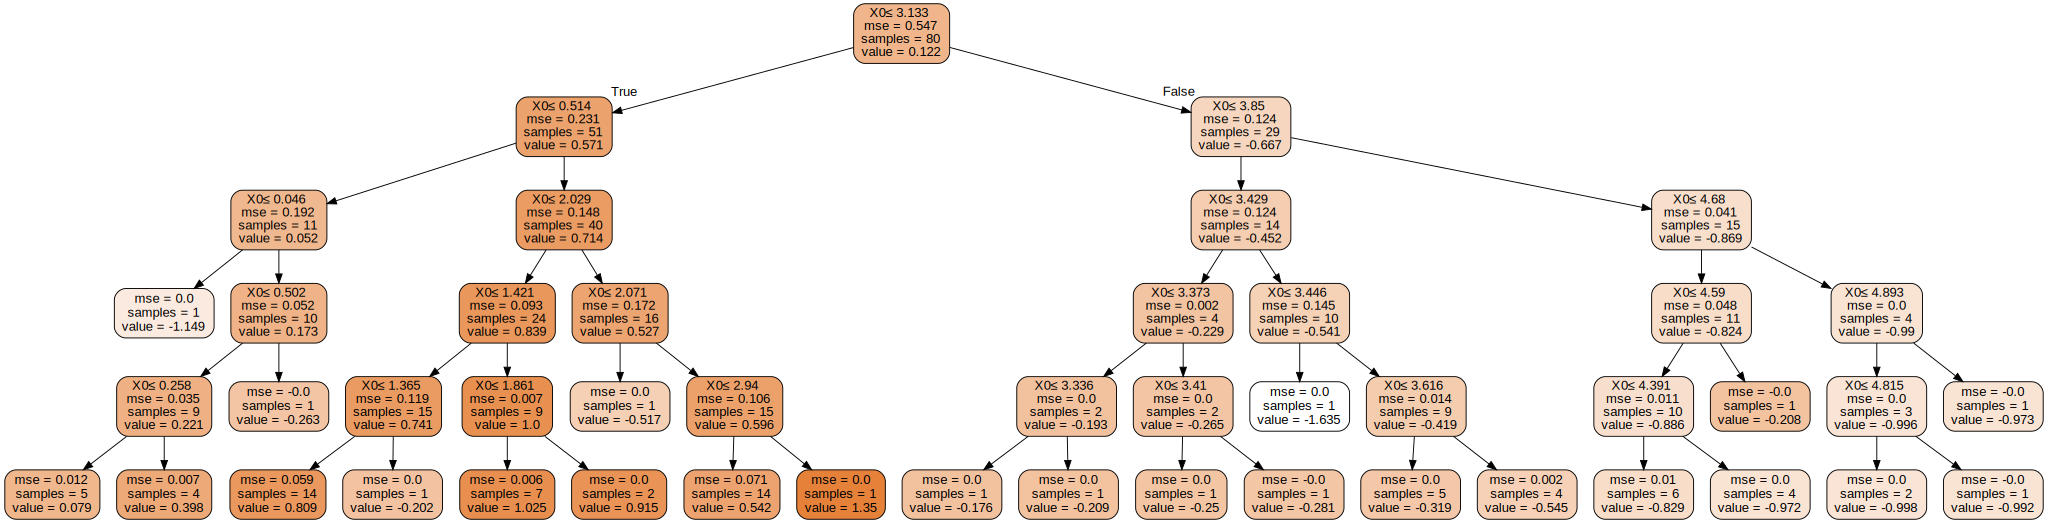

In [33]:
graph4

In [34]:
dot_data5 = tree.export_graphviz(regr1, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

In [35]:
graph5 = graphviz.Source(dot_data5)

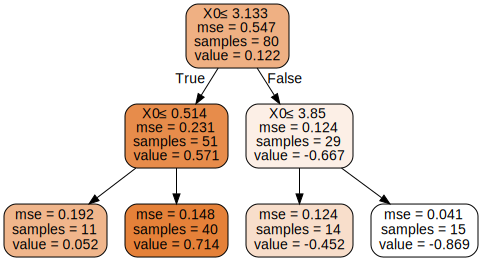

In [36]:
graph5